<a href="https://colab.research.google.com/github/rharkovsky/pucCienciadeDados/blob/main/MVP1_Harkovsky6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise Exploratória de Dados 

## ROBERTO HARKOVSKY DA CUNHA

### Base Movie Dataset: Budgets, Genres, Insights

## 1. Definição do Problema

A Netflix é um serviço de streaming de séries, filmes e documentários via internet, para milhares de aparelhos conectados à grande rede. Os programas originais da Netflix são programas produzidos e/ou encomendados internamente pelas próprias equipes de produção da Netflix.

Sobre o dataset:

O dataset utilizado neste projeto será o de uma coleção abrangente de informações sobre 4.803 filmes, proveniente originalmente do Kaggle. Ele fornece uma ampla gama de detalhes sobre cada filme, incluindo orçamento, gêneros, produtoras, data de lançamento, receita, tempo de execução, idioma, popularidade e muito mais.

O dataset utilizado neste projeto será o NetflixOriginals, proveniente originalmente do Kaggle. Os dados foram extraídos da página da Wikipedia (https://en.wikipedia.org/wiki/Lists_of_Netflix_original_films), que foram então integrados a um conjunto de dados que consiste em todas as respectivas pontuações do IMDB, que é uma escala de classificação de um a dez (melhor classificação). As pontuações do IMDB são obtidas através de votação dos membros da comunidade.
O conteúdo deste dataset se restringe a todos os filmes originais da Netflix lançados até 1º de junho de 2021, incluindo também os documentários e especiais. 

Informações sobre os atributos:
1. index - O índice do dataframe	
2. budget - O orçamento do filme	
3. genres - Os gêneros do filme	
4. homepage - O URL da página inicial do filme	
5. id - O identificador exclusivo do filme	
6. keywords - As palavras-chave associadas ao filme	
7. original_language - A língua original do filme	
8. original_title - O título original do filme	
9. overview - Uma breve visão geral ou resumo do filme	
10. popularity - A pontuação de popularidade do filme	
11. production_companies - 	As empresas de produção envolvidas na produção do filme	
12. production_countries - 	Os países onde o filme foi produzido	
13. release_date - 	A data de lançamento do filme	
14. revenue - A receita gerada pelo filme	
15. runtime - A duração do filme em minutos	
16. spoken_languages - As línguas faladas no filme	
17. status - O status do filme (por exemplo, lançado, rumores)	
18. tagline - O slogan ou slogan do filme	
19. title - O título do filme	
20. vote_average - 	A classificação média dada ao filme pelos usuários	
21. vote_count - O número de votos recebidos pelo filme	
22. cast - 	Os membros do elenco do filme	
23. crew - 	Os membros da equipe envolvidos na produção do filme	
24. director - O diretor do filme	


Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/utkarshx27/movies-dataset?resource=download



A hipótese a ser avaliada nesta análise é se algumas das seguintes variáveis (atributos) Language (Linguagem), Genres (Gênero), PREENCEH(Data lançamento) e Runtime (Duração) influenciam na bilheteria(faturamento)  do produto, que é medida pela variável "revenue".

O objetivo é buscar prever a receita gerada  ("revenue") de um determinado lançamento futuro.

Este é um problema de aprendizado supervisionado por regressão.

## 2. Carga de dados
Nesta primeira etapa será feita a importação dos pacotes necessários a análise, definição de funções úteis na análise e a carga do dataset.

Para uma melhor documentação decidi alterar os nomes das variáveis para português, segundo a seguinte regra:



### Importando Biliotecas

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

### Funções Personalizadas
Trata-se de um conjunto de funções úteis para impressão de gráficos e informações sobre os datasets utilizados ao longo desta análise exploratória, que aparecem em diversas etapas da análise.

O objetivo é tornar o código mais limpo e de fácil de entendimento.


In [2]:
# Função para impressão de 2 gráficos barplot: 
# parametros: 
# var1 - Atributo a ser agrupado por IMDB e titulos, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime_por_titulo_imdb (var1, linhas):

# Mostra top generos avaliados definido por parametro "linhas"
  plt.figure(figsize=(15,20))
  sns.set(style="darkgrid")

  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_titulos_df = ds.groupby([var1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_titulos_df = top_titulos_df[0:linhas]
  avg_rating_top_df = avg_rating_df[(avg_rating_df[var1].isin(top_titulos_df[var1]) == True)] # maiores IMDBs relativos top linhas
  avg_rating_abs_df = avg_rating_df[0:linhas] # maiores IMDBs absolutos

  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')
 # fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# 1o gráfico
  plt.subplot(2, 1, 1)
  ax1.set_title('Maiores Lançamentos de filmes (top '+ str(linhas) +') por ' + var1 , fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.barplot(x = 'Titulo', y = var1, data = top_titulos_df, ax = ax1)
  
# 2o gráfico
  plt.subplot(2, 1, 2)
  ax2.set_title('Média de Pontuações dos Maiores Lançamentos (top '+ str(linhas) +') por ' + var1 , fontsize = 10)
  ax2.set_xlabel('IMDB', fontsize = 10)
  #ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=6)
  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_top_df, ax=ax2)

  plt.subplots_adjust(hspace=0.8);
  plt.yticks(size= 10)
  plt.xticks(size= 10)
  plt.show()

# Função para impressão de um gráfico barplot por IMDB
# parametros: 
# var1 - Atributo a ser comparado, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime_groupby (var1, var2, linhas):
  avg_rating_df = ds.groupby([var1], as_index = False)[var2].mean().sort_values(var2, ascending=False)
  avg_rating_df = avg_rating_df[0:linhas] # maiores  absolutos

  fig, (ax1) = plt.subplots(1,1, figsize= (10,3), layout='constrained')

  ax1.set_title('Média de ' + var2 + ' Pontuações Absolutas  (top '+ str(linhas) +') por ' + var1 , fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  sns.barplot(x = var2, y = var1, data = avg_rating_df, ax=ax1)

  return(avg_rating_df)

# Função para impressão das tabelas que alimentam os graficos
# parametros: 
# atr1 - atributo agrupado
# atr2 - Atributo a ser contado/somado/media 
# linhas - quantidade de linhas da tabela a apresentar
# tab_num - imprime a tabela tab_num (1,2,3 ou 4) 
def tabela_por_titulo(atr1, atr2, linhas, tab_num):
  
  if  tab_num==1: # Titulos por periodo
    top_df = ds.groupby([atr1], as_index = False)[atr2].count().sort_values(atr2, ascending=False)
    top_df = top_df[0:linhas]
    display(top_df)
    total_titulos = top_df[atr2].sum()
    print(f'\n')
    print(f'Nestas top {linhas} ocorrências de {atr1} temos {total_titulos} títulos')
    print(f'Esta amostra equivale a {100*total_titulos/584:2.1f}% do total lançado')
  elif tab_num==2: # gross top
    top_df = ds.groupby([atr1], as_index = False)[atr2].count().sort_values(atr2, ascending=False)
    avg_rating_df = ds.groupby([atr1], as_index = False)[atr2].mean().sort_values(atr2, ascending=False)
    top_df = top_df[0:linhas]
    avg_rating_df = avg_rating_df[(avg_rating_df[atr1].isin(top_df[atr1]) == True)]
    max_imdb=avg_rating_df[atr2].max()
    min_imdb=avg_rating_df[atr2].min()
    display(avg_rating_df)
    print(f'\n')
    print(f'Nestas top {linhas} ocorrências de {atr1} por média de {atr2} temos valor máximo {max_imdb:2.1f} e minimo de {min_imdb:2.1f}')
  elif tab_num==3: # IMDB valores absolutos
    avg_rating_df = ds.groupby([atr1], as_index = False)[atr2].mean().sort_values(atr2, ascending=False)
    avg_rating_df = avg_rating_df[0:linhas]
    max_imdb=avg_rating_df[atr2].max()
    min_imdb=avg_rating_df[atr2].min()
    display(avg_rating_df)
    print(f'\n')
    print(f'Nestas {linhas} ocorrências de {atr1} por média de {atr2} temos valor máximo {max_imdb:2.1f} e minimo de {min_imdb:2.1f}')
  elif tab_num==4: # titulo IMDB asolutos
    top_df = ds.groupby([atr1], as_index = False)[atr2].count().sort_values(atr2, ascending=False)
    avg_rating_df = ds.groupby([atr1], as_index = False)[atr2].mean().sort_values(atr2, ascending=False)
    avg_rating_df = avg_rating_df[0:linhas]
    top_df = top_df[(top_df[atr1].isin(avg_rating_df[atr1]) == True)]
    #max_imdb=avg_rating_df['IMDB'].max()
    #min_imdb=avg_rating_df['IMDB'].min()
    display(top_df)

# Função para impressão de 2 gráficos boxplot
# parametros: 
# var1,var2 - Atributos a serem impressos 
def imprime2graficosboxplot(var1, var2):

  def outliers(variavel):
 #calculado a faixa dos quartis a serem usados
    imdb_q1 = ds[variavel].quantile(0.25) #1o quartil 
    imdb_q3 = ds[variavel].quantile(0.75) #3o quartil
    imdb_iqr = imdb_q3-imdb_q1 # calculando 2o quartil
    imdb_up = imdb_q3 + 1.5 * imdb_iqr #limte superior do 4o quartil
    imdb_low = imdb_q1 - 1.5 * imdb_iqr #limite inferior do 1o quartil
  # descobrindo os outliers 
    outlier_imdb = ds[(ds[variavel] < imdb_low) | (ds[variavel] > imdb_up)]
    count_imdb = outlier_imdb.count()[variavel]
    
    print(f"Outliers de {variavel}: {count_imdb}")
    return(ds[variavel])

# Imprimindo gráficos
  plt.figure(figsize=(10,15))
  #sns.set(style="darkgrid")
  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')

# 1o gráfico
  ax1.set_title('outliers de ' + var1 , fontsize = 10)
  #ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.boxplot(x = outliers(var1), ax=ax1)
  
# 2o gráfico
  ax2.set_title('outliers de ' + var2 , fontsize = 10)
  #ax2.set_xlabel('IMDB', fontsize = 10)
  sns.boxplot(x = outliers(var2), ax=ax2)
  
  plt.subplots_adjust(hspace=0.6);
  #plt.yticks(size= 10)
  #plt.xticks(size= 10)
  plt.show()

# Função para contagem de variaveis (atributos) por titulo
# parametros: 
# var - Atributos a serem contados 
def conta_var(var):
  general_df = ds.groupby([var], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  num = general_df[var].count()
  print(f'Existem {num} diferentes {var}')
  return(general_df)

### *Preparando o Dataset*

Carregando o dataset 

In [3]:
# conexão com GDrive
from google.colab import drive
drive.mount('/content/gdrive')
arquivo = "movie_dataset.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo

# Conexão com GitHub
#arquivo = "NetflixOriginals.csv"
#url_dados = "https://raw.githubusercontent.com/rharkovsky/puc_mvp1/main/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton




---


Preparando o dataframe para 1a análise:
1. Apagando colunas desnecessárias a análise
2. Avaiando e apagando linhas com muitos missings
3. Alterando o nome de algumas colunas para facilitar a análise
4. alterando o tipo de colunas qualitativas que são, na verdade, quantitativas

In [4]:
# apagando colunas desnecessárias a análise
# ds.drop(columns=['homepage'], inplace=True) # irrelevante para análise
# ds.drop(columns=['keywords'], inplace=True) # irrelevante para análise
# ds.drop(columns=['overview'], inplace=True) # irrelevante para análise
# ds.drop(columns=['tagline'], inplace=True)  # irrelevante para análise
# ds.drop(columns=['index'], inplace=True)    # irrelevante para análise
# ds.drop(columns=['id'], inplace=True) # irrelevante para análise ** USAR AO INVES DO TITULO
# ds.drop(columns=['original_title'], inplace=True) # já existe uma coluna "title"

# ds.drop(columns=['crew'], inplace=True)
# ds.drop(columns=['cast'], inplace=True)
# ds.drop(columns=['production_companies'], inplace=True)
# ds.drop(columns=['production_countries'], inplace=True)
# ds.drop(columns=['spoken_languages'], inplace=True)

# Alterando o nome de algumas colunas para facilitar a análise
# ds.rename(columns= {'original_language' : 'language'}, inplace= True)


# ds.head()

## 3. Análise Exploratória de Dados
O processo de análise exploratória irá envolver 3 fases: 

- Análise descritivas do dataset, onde serão levantadas suas dimensões, tipos de variáveis e estatísticas de frequência daqueles numerais.

- Em seguida começaremos a análise pelas visualizações unimodais, onde avaliaremos o comportamento das variáveis numéricas, sua distribuição estatística

- Após isto partiremos para visualizações multimodais, onde buscaremos as relações entre as possíveis variáveis preditoras e a variável alvo “percepção”.



### 3.1. Estatísticas Descritivas
Nesta primeira etapa será realizada uma análise descritiva do dataset, onde serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

In [5]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(4803, 24)


O dataset possui 24 colunas com 4803 linhas

In [6]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

*** Linhas duplicadas ***
0


Diversas Linhas missing nos atributos serão tratadas na etapa de pre-processamentode dados

In [7]:
# Mostra as informações sobre as variáveis do dataset
display(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

*   8 variáveis quantitativas numéricas

*   16 variáveis qualitativas


In [8]:
# exibindo um sumário estatístico
display(ds.describe())

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000



---


**Percepções** 

**Análise descritiva**

•	Temos um dataset com  24 colunas com 4803  instâncias

•	No dataset temos um total de 24 variáveis, onde 16 são do tipo object qualitativas e 8 quantitativas numéricas

**Análise estatística**

*   Os valores minimos em 0 (zero) pode indicar missings nas diversas variáveis
*   Variáveis "id" e "index" apesar de numéricas são categóricas


---



### 3.2. Visualizações Unimodais

Para avaliar a distribuição de frequências das variáveis numéricas iremos utilizar gráficos de histograma e de densidade para cada um destes atributos numéricos do dataset.

Utilizaremos ainda o gráfico de boxplot para verificar a existência de outliers.


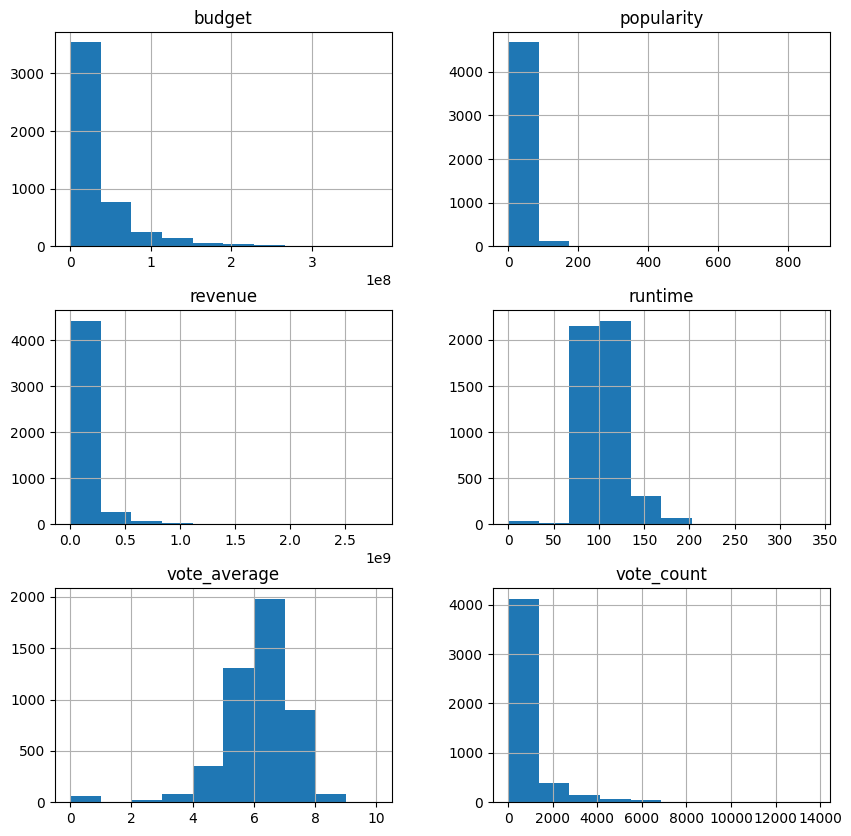

In [11]:
# Histograma
# retirando variaveis categóricas
df=ds[:]
df.drop(columns=['id'], inplace=True)
df.drop(columns=['index'], inplace=True)

# Gerando o histograma
df.hist(figsize = (10,10))
plt.show()

O gráfico mostra que as variáveis RunTime e Meta_score com e um comportamento aproximado de uma curva normal. As demais apresentam um comportamento exponencial, já esperado, pois a amostra trouxe os 1000 melhores filmes (IMDB ato, mais votos e maiores bilheterias)

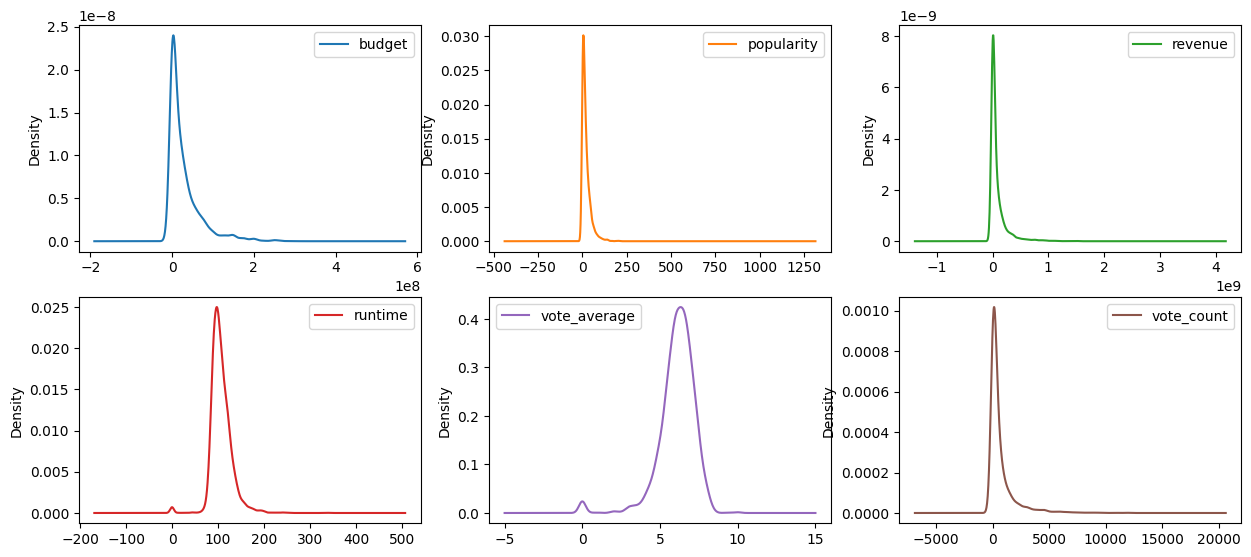

In [12]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Os gráficos de densidade apresentam um comportamento unimodal nas variáveis, sem skew.

**Determinando os Outliers**

Em seguida, utilizarei gráficos de boxplot para visualmente observar a existencia de outliers nas variáveis IMDB e Duração

In [45]:
#imprime2graficosboxplot('IMDB', 'Duracao')

O gráfico de Boxplot apresenta outliers em ambas variáveis: 9 em IMDB, e 75 em Duracao

---

**Resumo das percepções da análise da visualização Unimodal:**

- Os gráficos de histograma e densidade mostram as variáveis IMDB e Duracao apresentando um comportamento aproximado de uma curva normal.

- Os gráficos de densidade mostram ainda comportamento unimodal para cada variável e, também não apresentam skew. 

- O valor das medianas das variáveis é próximo a média, apesar dos outliers presentes. A média do tempo de duração é 94 minutos e a mediana 97, enquanto a média do IMDB é 6,3 e a mediana 6,4.

- Existem outliers em ambas as variáveis: 9 em IMDB, e 75 em Duração, mas que nao afetam muito a média, pois a mediana está bem próxima. 








---

### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma relação entre as variáveis preditoras com a variável alvo "revenue".

Iniciaremos com o estudo de correlação entre as variáveis, destacando a variável alvo "revenue". 

Em seguida interessa-nos avaliar a existência de um possível relacionamento entre as variáveis quantitativas e a variave alvo "revenue"


**Estudo de correlação**

Iniciarei com o estudo da correlação das variáveisl numéricas, com foco na variável alvo "Gross". 


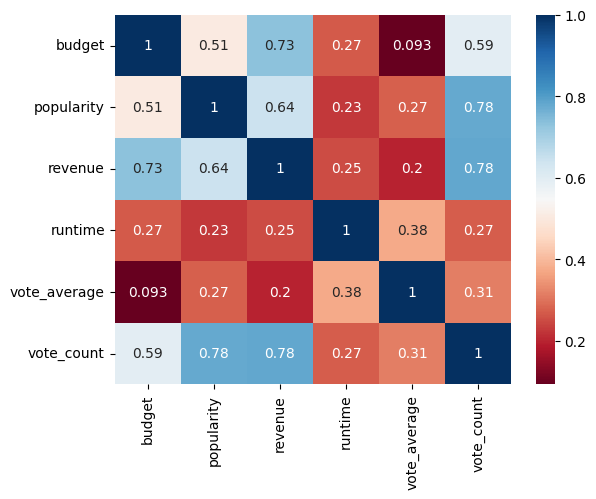

In [13]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

Aparentemente temos correlações consideraveis entre a variavel alvo "revenue" e as variáveis "budget", "popularity" e "vote_count", indicando que possivelmente 2 pontos:
  

1.   Filmes com maior orçamento tendem a ter maior receita de bilheteria.
2.   Filmes mais populares tendem a ter maior receita de bilheteria.
3.   Filmes mais votados pelo público tendem a ter maior receita de bilheteria.




---


Observando agora a relação da variavel alvo "revenue" com demais variáves quantitativas

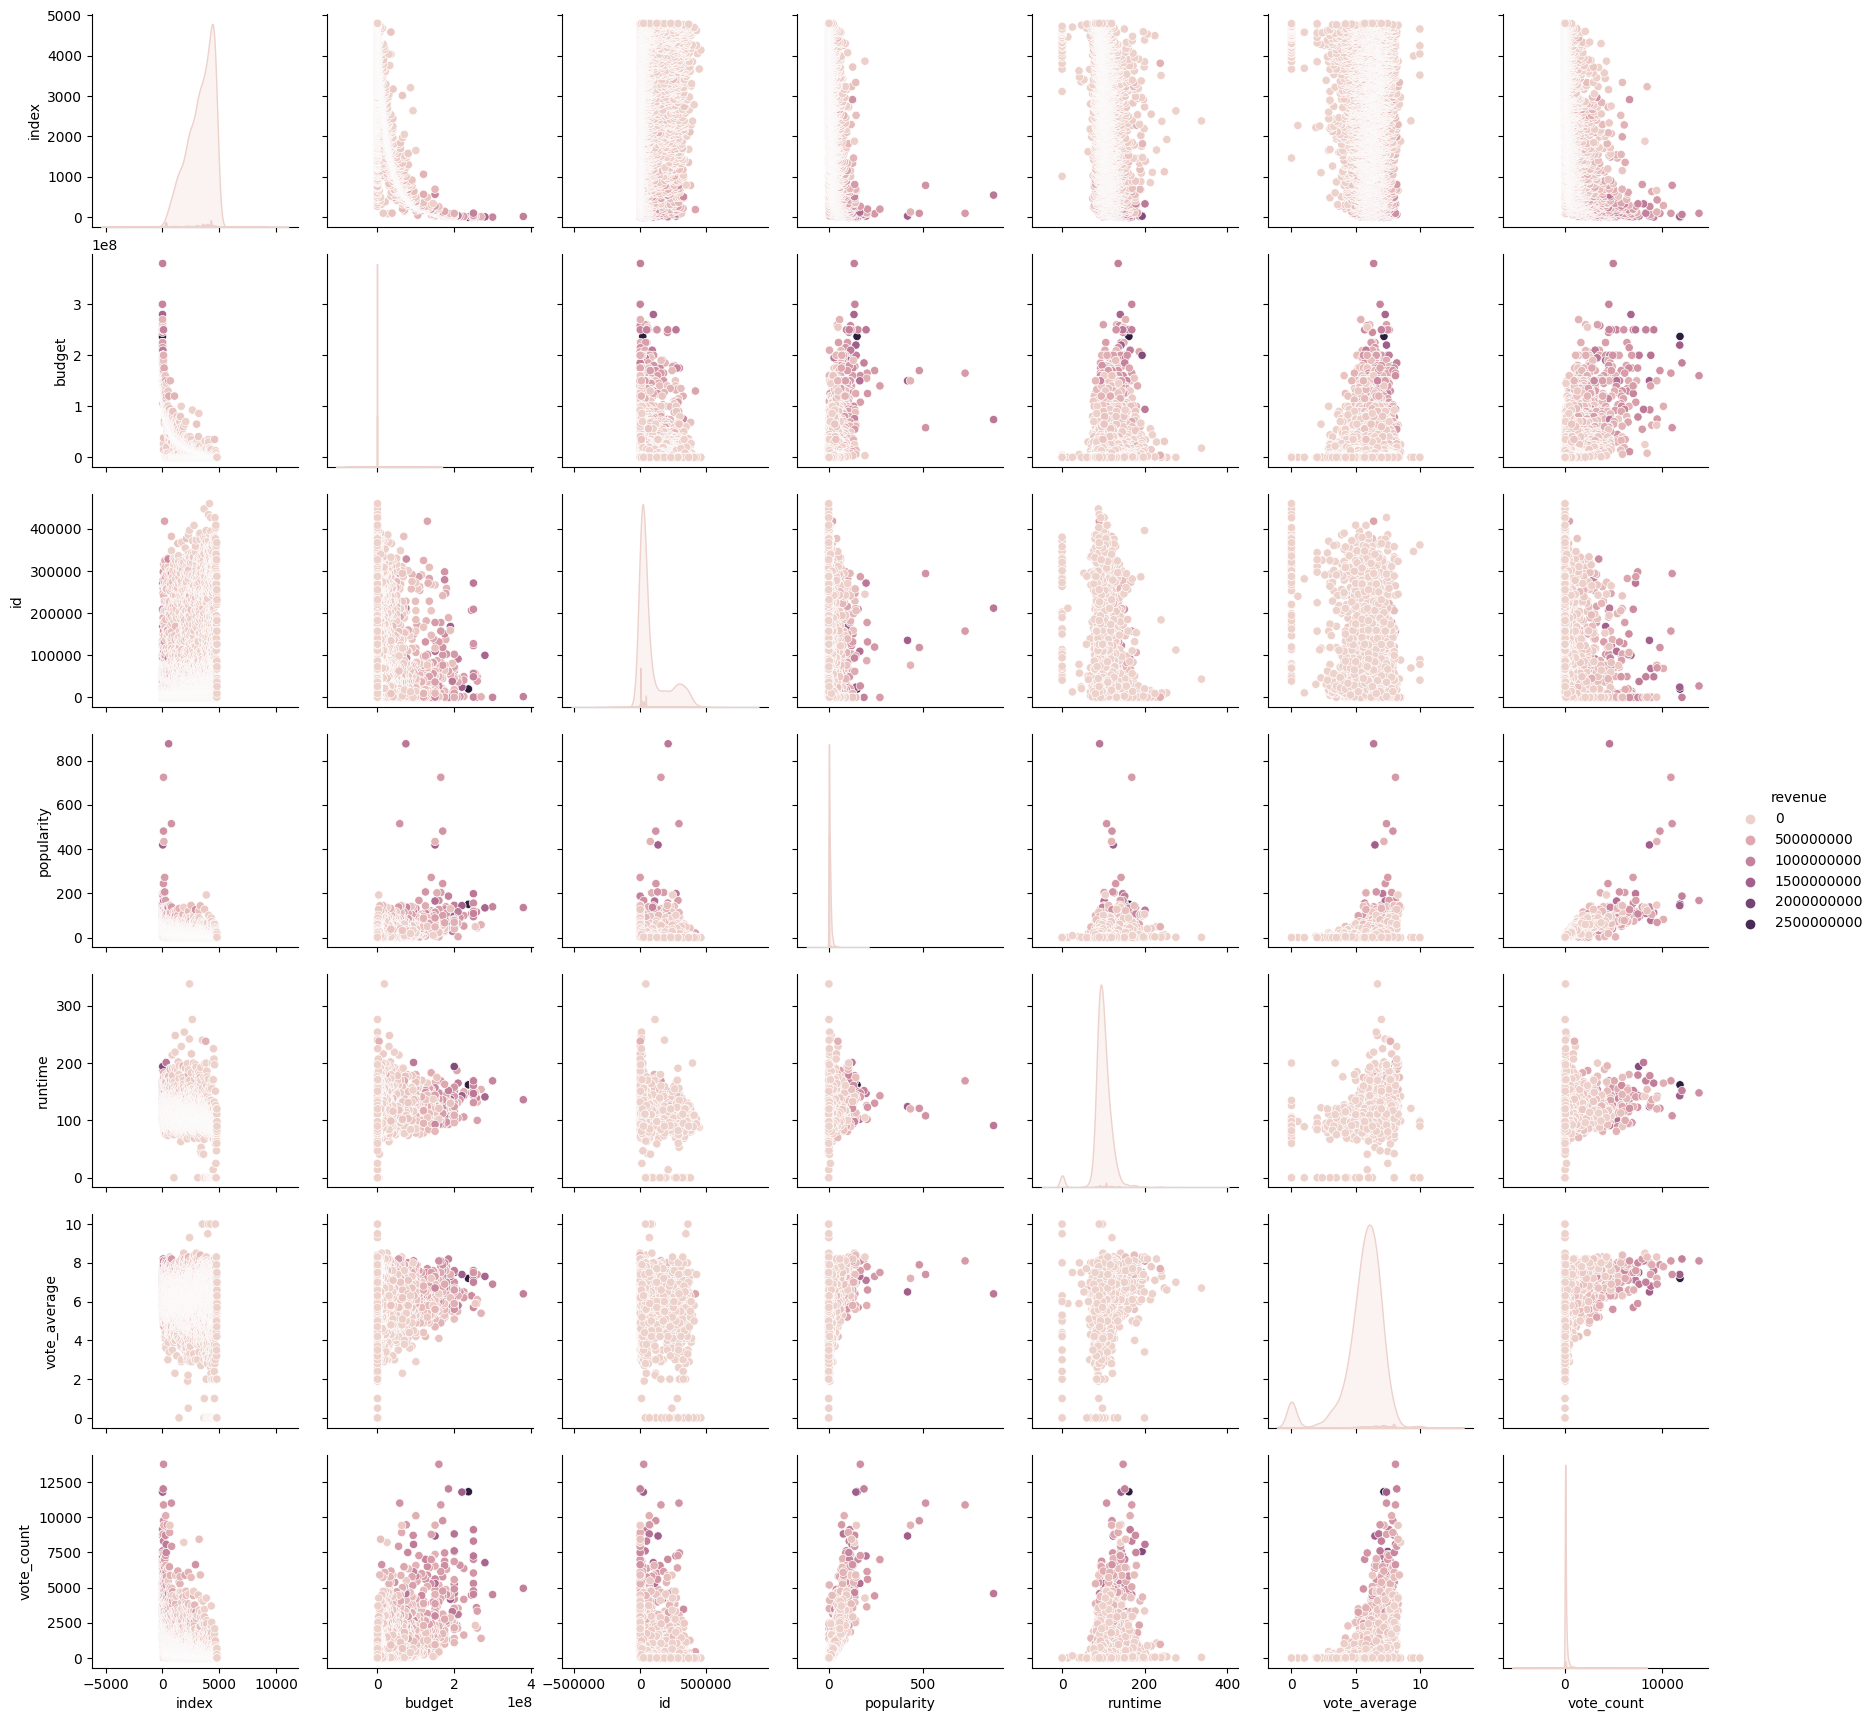

In [14]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(ds, hue = "revenue", height = 2.5);

<Figure size 3000x3000 with 0 Axes>

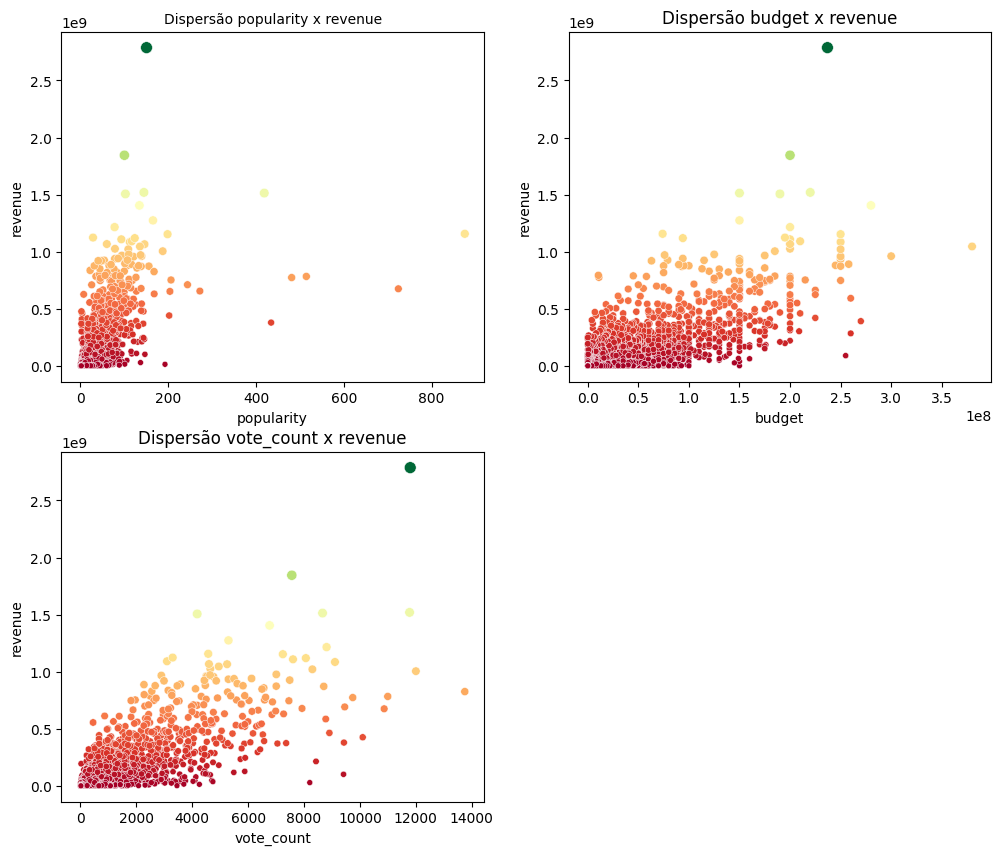

In [55]:
plt.figure(figsize=(30,30))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(12,10))

# 1o gráfico
plt.subplot(2, 2, 1)
sns.scatterplot(data= ds, x= 'popularity', y= 'revenue', hue= 'revenue', 
                size= 'revenue', palette= 'RdYlGn', legend= False)

plt.title('Dispersão popularity x revenue', fontsize = 10)
plt.ylabel('revenue', fontsize = 10)
plt.xlabel('popularity', fontsize = 10)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=6)

# 2o gráfico
plt.subplot(2, 2, 2)
sns.scatterplot(data= ds, x= 'budget', y= 'revenue', hue= 'revenue', 
                size= 'revenue', palette= 'RdYlGn', legend= False)

plt.title('Dispersão budget x revenue', size= 12)
plt.xlabel('budget', size= 10)
plt.ylabel('revenue', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)

# 3o gráfico
plt.subplot(2, 2, 3)
sns.scatterplot(data= ds, x= 'vote_count', y= 'revenue', hue= 'revenue', 
                size= 'revenue', palette= 'RdYlGn', legend= False)

plt.title('Dispersão vote_count x revenue', size= 12)
plt.xlabel('vote_count', size= 10)
plt.ylabel('revenue', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)


plt.show()


---


**Percepção da análise Multimodal de correlação e dispersão**

•	Aparentemente temos 2 correlações consideraveis entre a variavel alvo "revenue" e as variáveis "budget", "popularity" e "vote_count", indicando que possivelmente 2 pontos:

1. Filmes com maior orçamento tendem a ter melhor retorno de bilheteria.
2. Filmes mais populares tendem a ter melhor retorno de bilheteria.
3. Filmes mais votados pelo público tendem a ter melhor retorno de bilheteria.

REVER DEMAIS ABIXO

•	Avaliando o relacionamento no gráfico de dispersão, aparentemente as maiores notas IMDB se situam em volta da média de duração (90 minutos), com até uma variação correspondente a um desvio padrão de distância (30 minutos).

•	Um outro achado é que aparentemente os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem avaliações mais altas em comparação a média.








---





---
**Estudo de demais relacionamentos**

Continuando a análise exploratória, a ideia a seguir é analisar o comportamento das variáveis categóricas com a variável alvo "revenue"

---



In [56]:
#print(ds.columns[:])
# selecionando colunas categóricas de interesse 
cols = ['genres', 'language', 'release_date', 'revenue', 'id', 'director']

**i. Relação entre o ano do lançamento e a bilheteria (revenue) obtida.**

Nesta etapa da análise das variáveis qualitativas categóricas, será avaliada a relação entre as mesmas e a bilheteria ("revenue"). Para isto as questões a responder aqui serão:

1.	Quais as linguagens que obtiveram maior bilheteria? existe relação?
2.	Existem gêneros de filmes que implicam em maiores bilheterias?
3.  A escolha do diretor influencia a bilheteria?



<Axes: xlabel='director'>

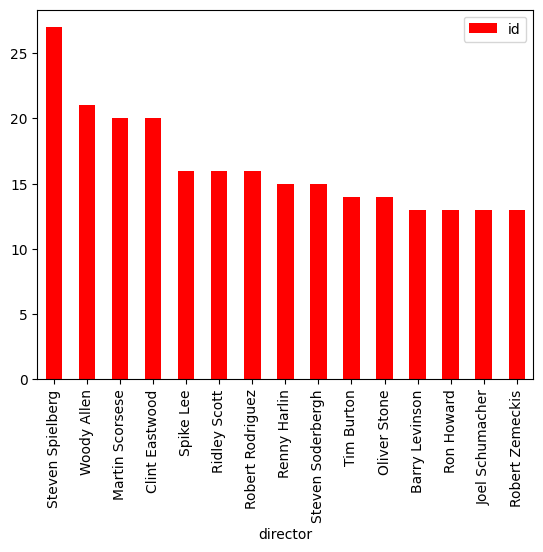

In [16]:
linhas = 15
ds.groupby(["director"], as_index = False)['id'].count().sort_values(
            'id', ascending=False)[0:linhas].plot(kind = "bar", color='red', 
                                                     y='id', x='director')

<Axes: xlabel='director'>

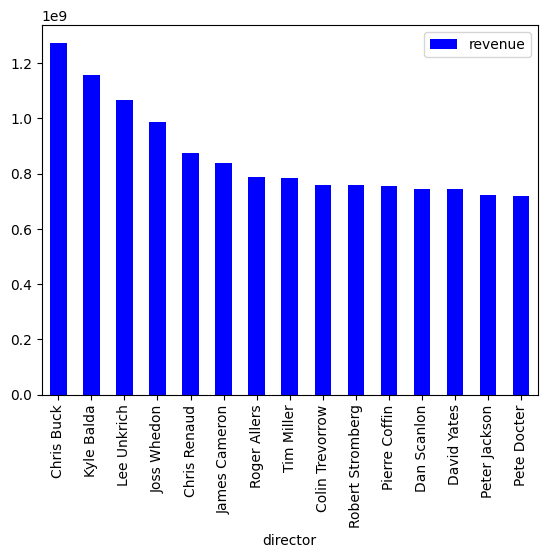

In [59]:
linhas = 15
ds.groupby(["director"], as_index = False)['revenue'].mean().sort_values(
    'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='blue', 
                                               y='revenue', x='director')

<Axes: xlabel='language'>

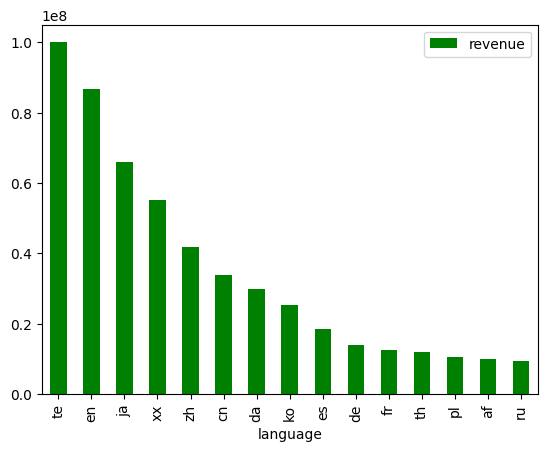

In [60]:
linhas = 15
ds.groupby(["language"], as_index = False)['revenue'].mean().sort_values(
    'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='green', 
                                               y='revenue', x='language')

<Axes: xlabel='genres'>

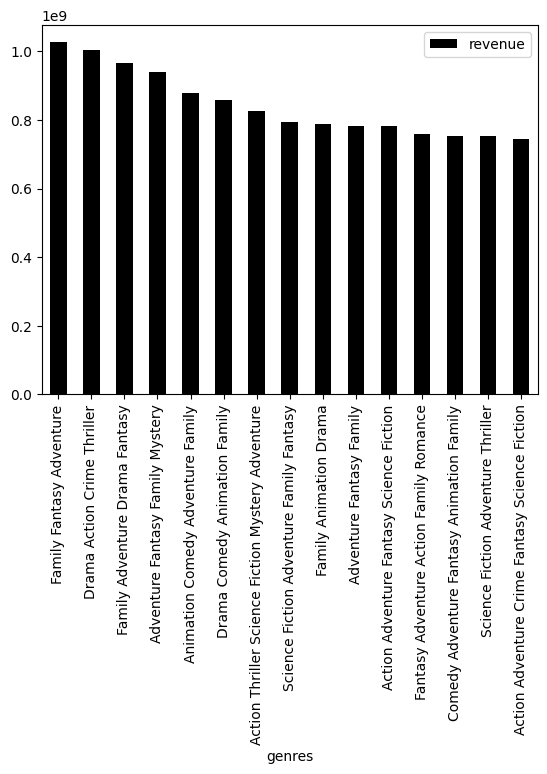

In [61]:
# VER SE VALE A PENA QUEBRAR OS VALORES DE GENERO
linhas = 15
ds.groupby(["genres"], as_index = False)['revenue'].mean().sort_values(
    'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='black', 
                                               y='revenue', x='genres')

In [17]:
# # preparando os gráficos
# plt.figure(figsize= (15, 10))
# linhas = 15

# # gráfico de quantidade por diretor
# plt.subplot(4, 1, 1)
# plt.title('Lançamentos por diretor', size= 12)
# plt.ylabel('Lançamentos', size= 8)
# plt.xlabel('diretor', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["director"], as_index = False)['title'].count().sort_values(
#             'title', ascending=False)[0:linhas].plot(kind = "bar", color='red', 
#                                                      y='title', x='director')

# # gráfico de revenue por diretor
# plt.subplot(4, 1, 2)
# plt.title('revenue médio por diretor', size= 12)
# #plt.ylabel('Lançamentos', size= 8)
# plt.xlabel('director', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["director"], as_index = False)['revenue'].mean().sort_values(
#     'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='blue', 
#                                                y='revenue', x='director')

# # gráfico de IMDB por ano
# plt.subplot(4, 1, 3)
# plt.title('revenue médio por linguagem', size= 12)
# plt.ylabel('revenue', size= 8)
# plt.xlabel('language', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["language"], as_index = False)['revenue'].mean().sort_values(
#     'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='green', 
#                                                y='revenue', x='language')

# # gráfico de Meta por ano
# plt.subplot(4, 1, 4)
# plt.title('revenue médio por genero', size= 12)
# #plt.ylabel('Lançamentos', size= 8)
# plt.xlabel('genre', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["genres"], as_index = False)['revenue'].mean().sort_values(
#     'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='black', 
#                                                y='revenue', x='genres')


# # apresentando os gráficos
# plt.subplots_adjust(hspace=0.6);
# plt.show()

## 4. Pré-Processamento de dados

Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 4.1. Tratamento de Missings e Limpeza

Nesta fase de limpeza iremos avaliar a possível ocorrência de nulls e/ou linhas duplicadas, e fazer os devidos ajustes, se necessário.

Etapas propostas:

1. Apagando colunas desnecessárias a análise;
2. Avaliando e apagando linhas com muitos missings;
3. Alterando o nome de algumas colunas para facilitar a análise;
4. Alterando o tipo de colunas qualitativas que são, na verdade, quantitativas.




---


Iniciando apagando colunas desnecessárias

In [19]:
# apagando colunas desnecessárias a análise
ds.drop(columns=['homepage'], inplace=True) # irrelevante para análise
ds.drop(columns=['keywords'], inplace=True) # irrelevante para análise
ds.drop(columns=['overview'], inplace=True) # irrelevante para análise
ds.drop(columns=['tagline'], inplace=True)  # irrelevante para análise
ds.drop(columns=['index'], inplace=True)    # irrelevante para análise
ds.drop(columns=['title'], inplace=True)    # irrelevante para análise 
ds.drop(columns=['original_title'], inplace=True) # já existe uma coluna "title"
ds.drop(columns=['cast'], inplace=True)
ds.drop(columns=['crew'], inplace=True)
ds.drop(columns=['production_companies'], inplace=True)
ds.drop(columns=['production_countries'], inplace=True)
ds.drop(columns=['spoken_languages'], inplace=True)

# Alterando o nome de algumas colunas para facilitar a análise
ds.rename(columns= {'original_language' : 'language'}, inplace= True)

ds.head()

,budget,genres,id,language,popularity,release_date,revenue,runtime,status,vote_average,vote_count,director
0,237000000,Action Adventure Fantasy Science Fiction,19995,en,150.437577,2009-12-10,2787965087,162.0,Released,7.2,11800,James Cameron
1,300000000,Adventure Fantasy Action,285,en,139.082615,2007-05-19,961000000,169.0,Released,6.9,4500,Gore Verbinski
2,245000000,Action Adventure Crime,206647,en,107.376788,2015-10-26,880674609,148.0,Released,6.3,4466,Sam Mendes
3,250000000,Action Crime Drama Thriller,49026,en,112.312950,2012-07-16,1084939099,165.0,Released,7.6,9106,Christopher Nolan
4,260000000,Action Adventure Science Fiction,49529,en,43.926995,2012-03-07,284139100,132.0,Released,6.1,2124,Andrew Stanton


In [20]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
budget           0
genres          28
id               0
language         0
popularity       0
release_date     1
revenue          0
runtime          2
status           0
vote_average     0
vote_count       0
director        30
dtype: int64

*** Linhas duplicadas ***
0




---


**Tratando variável "status"** 

In [23]:
# examinando coluna status para ver os campos diferente de released
df=ds.groupby(['status'])['id'].count()
df.head()

status
Post Production       3
Released           4795
Rumored               5
Name: id, dtype: int64

Faltam várias informações nas linhas com  "status" "Rumored" e "Post Production". Assim vamos eliminar estas linhas, ficando somente com os filmes lançados ("Released")

In [24]:
# Apagando as linhas com Status diferente de "Released"
ds = ds.loc[ds['status']=="Released"]

Tratamento de valores 0 (zero) sem sentido

In [78]:
# Apagando as linhas com valores 0 sem sentido
ds = ds.loc[ds['budget']!=0]
ds = ds.loc[ds['revenue']!=0]
ds = ds.loc[ds['runtime']!=0]
ds = ds.loc[ds['vote_average']!=0]
ds = ds.loc[ds['vote_count']!=0]

# exibindo um sumário estatístico
display(ds.describe())

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.226000e+03,3226.000000,3226.000000,3.226000e+03,3226.000000,3226.000000,3226.000000
mean,4.069076e+07,44599.926224,29.059970,1.213554e+08,110.721327,6.313577,978.191878
std,4.440139e+07,74293.205444,36.172263,1.863529e+08,20.973593,0.859869,1414.655947
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,2.300000,1.000000
25%,1.050000e+07,4952.750000,10.478490,1.708414e+07,96.000000,5.800000,178.250000
50%,2.500000e+07,11440.500000,20.421905,5.522308e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,45215.250000,37.350800,1.464463e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000




---


**Tratamento dos missings**

<Axes: >

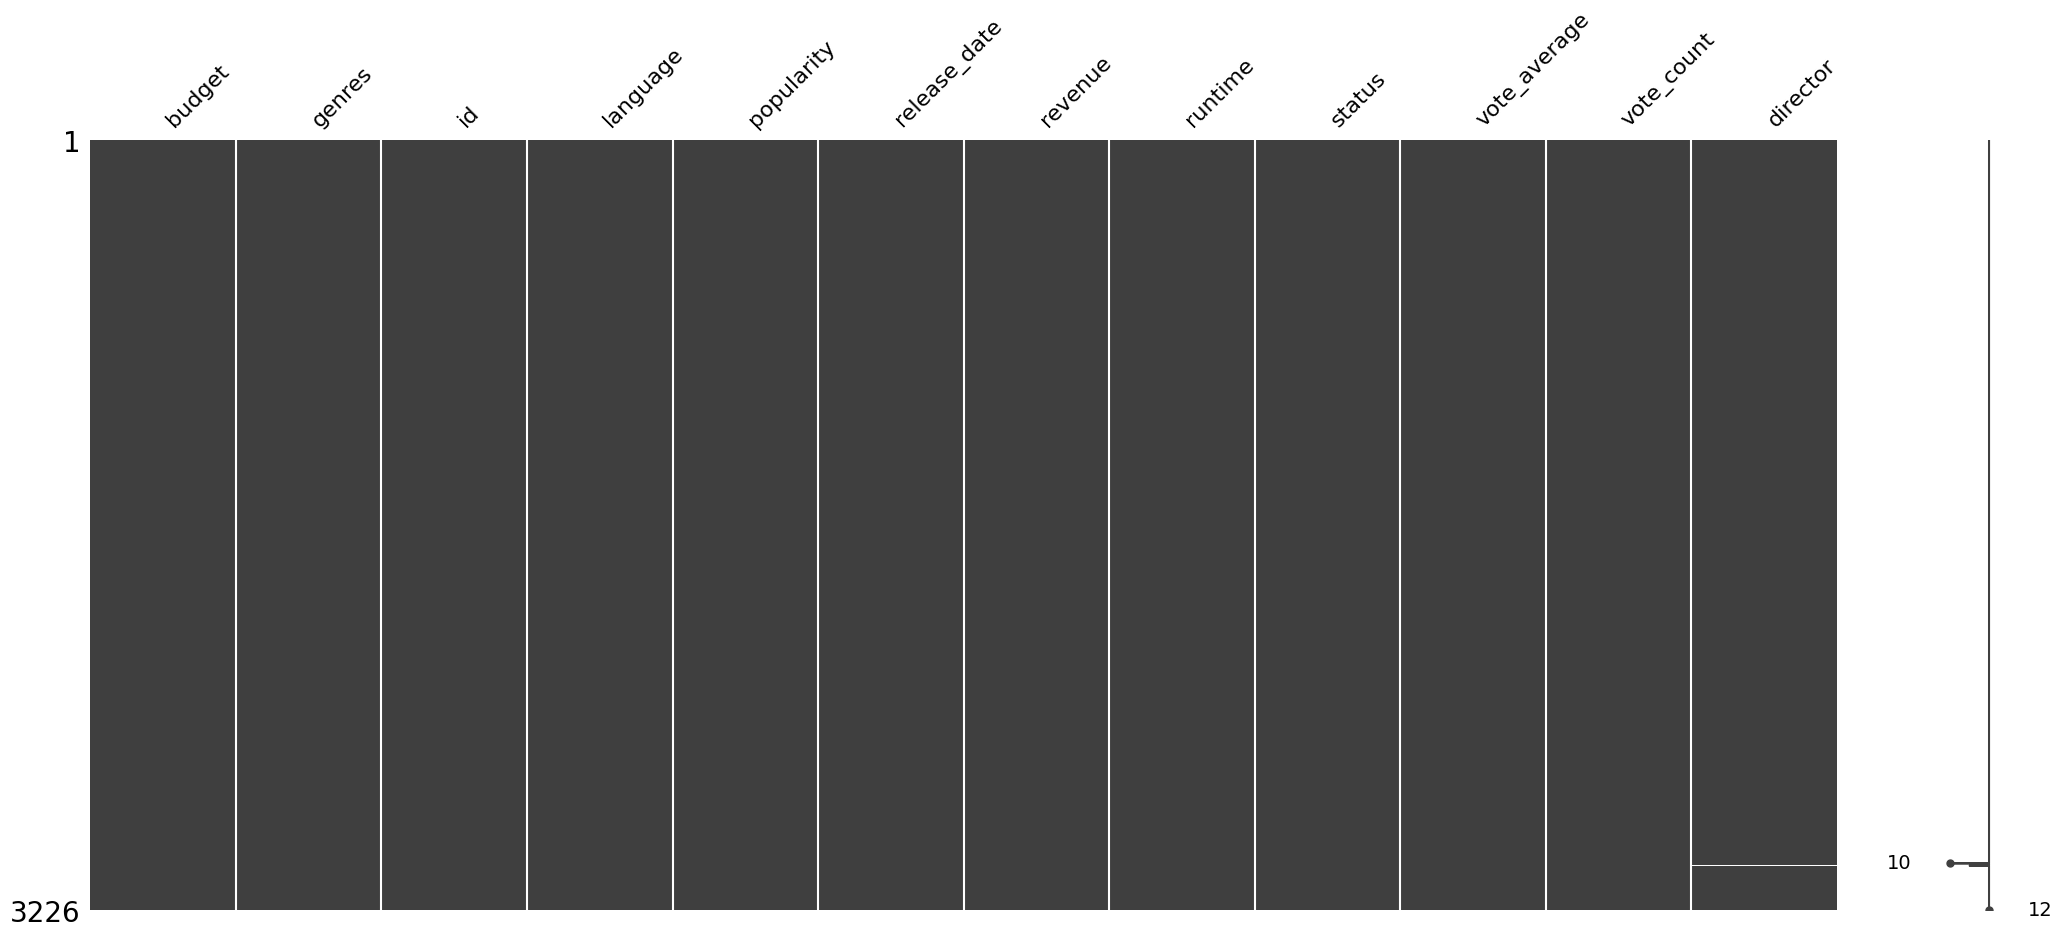

In [79]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_nomiss = ds[col[:]]

# substituindo os zeros por NaN
#ds_nomiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_nomiss)



---


---


**Tratando as variável "director", "runtime" e "genres"** 

<Axes: >

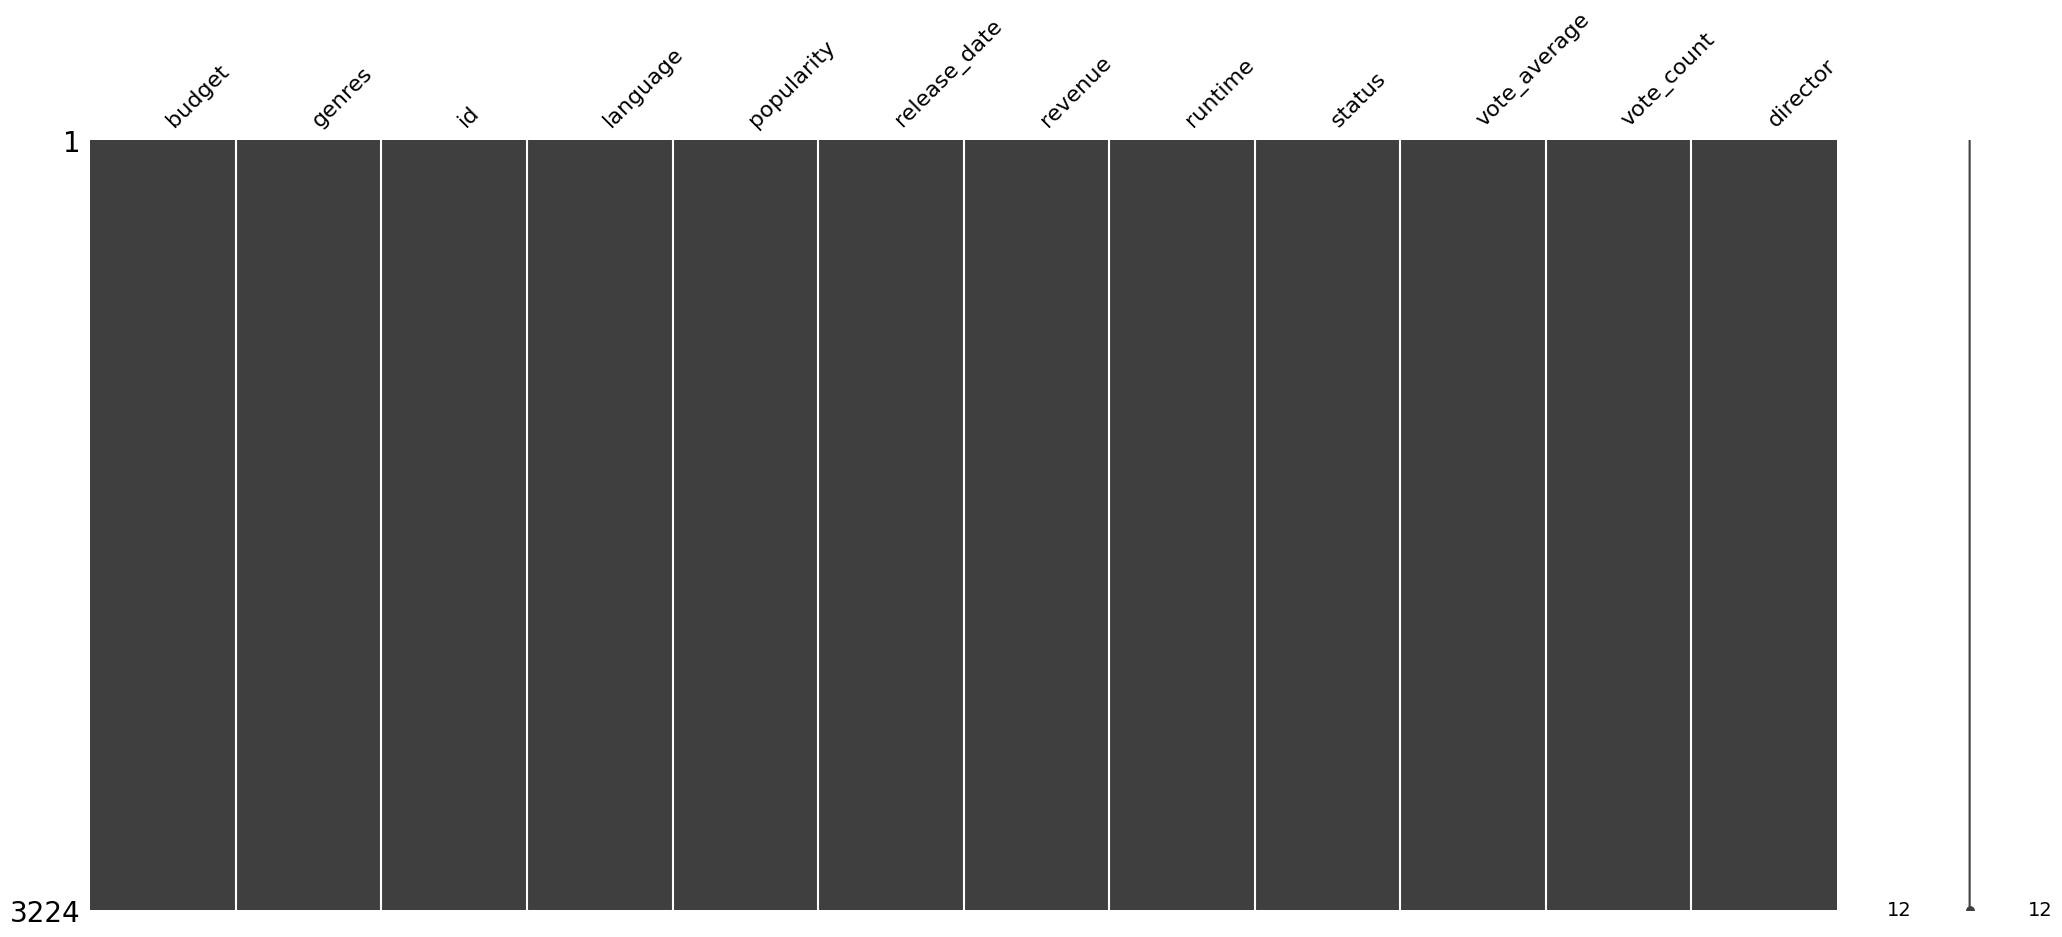

In [80]:
# Apagando as linhas com missing nas variaveis 
ds_nomiss = ds_nomiss.loc[~ds_nomiss['director'].isnull()]
ds_nomiss = ds_nomiss.loc[~ds_nomiss['genres'].isnull()]
ds_nomiss = ds_nomiss.loc[~ds_nomiss['runtime'].isnull()]
# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_nomiss)

### 4.2. Separação em conjunto de treino e conjunto de teste

Nesta fase iremos determinar um conjunto de testes, que se trata de uma amostra de dados que será usado no treino do futuro modelo. A variável alvo é IMDB.

Será arbitrado que 20% dos dados serão usados para testes e os demais para treino do modelo.

Serão separadas as variaveis preditoras "Genero", "Duracao", "Linguagem", "Ano", "Mes" e "DiaSemana" e a variável alvo "IMDB".

In [ ]:
# Especificando as colunas a serem usadas no treino
col_X = [ 'Genero', 'Duracao', 'Linguagem', 'DiaSemana', 'Mes', 'Ano']
col_y = ['IMDB']
# o novo dataset irá conter apenas as colunas preditoras
dspreditor = ds[col_X[:]]

# definindo parametros de teste/treino
test_size = 0.20 # tamanho do conjunto de testes.
seed = 9 # semente geradora dos numeros aleatórios

X = dspreditor# variaveis preditoras Genero, Duracao, linguagem, Ano, Mes e DiaSemana
y = ds[col_y] # variavel alvo - IMDB

# checando os conjunto criados
print(f'Variaveis preditoras: \n {X[0:5]}')
print(f'Variavel Alvo: \n {y[0:5]}')

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

Variaveis preditoras: 
                   Genero  Duracao         Linguagem  DiaSemana  Mes   Ano
0            Documentary       58  English/Japanese          0    8  2019
1               Thriller       81           Spanish          4    8  2020
2  Science fiction/Drama       79           Italian          3   12  2019
3        Horror thriller       94           English          4    1  2018
4                Mystery       90             Hindi          4   10  2020
Variavel Alvo: 
    IMDB
0   2.5
1   2.6
2   2.6
3   3.2
4   3.4


In [ ]:
# Checando dados de treino e teste
display(X_train)
display(y_train)
display(X_test)
display(y_test)

,Genero,Duracao,Linguagem,DiaSemana,Mes,Ano
138,Comedy,103,English,4,8,2020
529,Documentary,40,English,2,7,2020
518,Comedy-drama,97,English,4,6,2016
269,Drama,111,English,4,4,2021
287,Crime drama,120,English/Japanese,4,3,2018
...,...,...,...,...,...,...
125,Comedy,103,English,4,5,2019
56,Drama,86,Indonesian,3,10,2020
501,Documentary,24,English,1,9,2016
348,Horror,94,Hindi,2,6,2020


,IMDB
138,5.6
529,7.4
518,7.3
269,6.3
287,6.3
...,...
125,5.5
56,5.0
501,7.3
348,6.6


,Genero,Duracao,Linguagem,DiaSemana,Mes,Ano
317,Drama,99,English,4,3,2019
98,Supernatural drama,92,German,2,9,2020
39,Action,80,French,4,3,2021
40,Anime / Short,4,English,3,4,2020
356,Documentary,58,English,4,12,2018
...,...,...,...,...,...,...
378,Documentary,19,Japanese,0,10,2019
442,Documentary,48,English,4,4,2019
257,Action comedy,111,English,4,3,2020
105,Romantic comedy,97,English,3,11,2020


,IMDB
317,6.4
98,5.4
39,4.7
40,4.7
356,6.6
...,...
378,6.7
442,7.0
257,6.2
105,5.4


**Transformação categórica** 

Passando a preparar os dados categóricos de treino e teste para futuro uso nos modelos de ML - a variável de classe IMDB já é numérica

In [ ]:
# one hot encode para os atributos treino e teste de X
encoded_X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
encoded_X_test = OneHotEncoder(sparse=False).fit_transform(X_test)


## **Conclusão**



---

O objetivo desta análise foi o de buscar prever a pontuação IMDB de um determinado lançamento original futuro da Netflix utilizando a base NetflixOriginals. Este é um problema de aprendizado supervisionado por regressão.
As variáveis envolvidas foram:
1.	Title (“Titulo”) - Título do filme
2.	Genre (“Genero”) - Gênero do filme
3.	Premiere - Data de estreia do filme original
4.	Runtime (“Duracao”) - Tempo de execução do filme em minutos
5.	IMDB Score (“IMDB”) - Pontuações do IMDB que indicam a aceitação do público para o produto original lançado
6.	Language (“Linguagem”) - Linguagem na qual o filme foi produzido

A variável "Premiere" foi desdobrada em 4 novas variáveis: 

7. Data - Data do lançamento
8.	Ano – Ano dos lançamentos;
9.	Mês – Mês dos lançamentos;
10.	DiaSemana – dia da semana dos lançamentos

**Com relação a análise, em função da duração dos filmes:**

•	Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB).

•	Aparentemente as maiores pontuações IMDB se situam em volta da média de duração (90 minutos), com até uma variação correspondente a um desvio padrão de distância (30 minutos).

•	Os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem avaliações mais altas em comparação a média.

•	Observou-se uma leve tendência de queda na pontuação média anual dos lançamentos desde 2015, inversamente proporcional a quantidade de lançamentos, o que pode sugerir uma estratégia da Netflix em privilegiar a quantidade em detrimento à qualidade dos lançamentos.

**A análise do gênero e linguagem mostrou o seguinte:**

•	A análise sugere que existem linguagens com melhor pontuação. Os filmes na linguagem em inglês (*English*), que tem uma amostragem maior, apresentaram uma pontuação IMDB próxima a média; outras linguagens como *japonês, espanhol, português, marathi, e Hindi* apresentaram comportamento similar, sugerindo possível relação.

•	Sobre os gêneros, a análise mostrou alguma relação com o tipo de gênero e sua pontuação. Os gêneros *Documentary*, *Drama* parecem serem os mais bens aceitos, com pontuação acima da média.

•	O gênero *Documentary* foi o único lançado nos anos de 2014 e 2015, o que explica a grande diferença de quantidade de títulos deste gênero em relação ao segundo colocado.

•	A linguagem "inglês" (English) foi a única lançada em 2014 a 2017, com exceção em 2016 quando o espanhol (*Spanish*) também foi utilizado, o que explica a grande diferença na quantidade de títulos em inglês em relação ao segundo colocado.


**Sobre o pré-processamento dos dados:**

- A base analisada não continha elementos duplicados, faltantes e nem nulos. 

- Foi possível criar conjunto de treino e conjunto de teste para treinar um futuro modelo.

- Foi aplicada transformação categórica nas variáveis quantitativas dos conjuntos de teste e treino.

**Palavras finais:**

Com base nestas observações e percepções, creio ser possível a construção de um modelo para predizer o valor da pontuação IMDB dos filmes com base nas variáveis preditoras "Language" ("Linguagem"), "Genre" ("Gênero"), "Premiere" (suas derivadas "Ano", "Mes", "DiaSemana") e "Runtime" ("Duracao"). 

Seria interessante completar o dataset com os anos 2021 (2a metade), 2022 e 2023 para avaliar se o comportamento estudado das variáveis se mantém.

Finalmente, observo que baseado em pesquisas realizadas em outros datasets similares, creio que o acréscimo de novas variáveis como por exemplo “ator principal” e “diretor”, podem melhorar o processo de predição. 

---

